- Aulas F081 a

___

In [1]:
import pandas as pd

In [2]:
# Importando a base de dados
arquivo_caminho = 'kc_house_data.csv'

dataset = pd.read_csv(arquivo_caminho, sep=',')

In [17]:
dataset['date'] = pd.to_datetime(dataset['date'])

# Missing Values

- **Missing values** são valores faltantes em colunas, esses podem ser oriundos de falhas em cargas de dados, falhas em crawlers ou até mesmo corrupção de dados;
- Missing Values podem ser um problema em várias situações, como por exemplo, algoritmos de machine learning que não trabalham bem com dados faltantes;
- Estes também podem atrapalhar resultados de análises;
- Vamos aprender como encontrar missing values na base de dados e como manipular esses valores.

In [3]:
# Consultando linhas com valores faltantes
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Com este comando, removeremos todas as linhas onde tenha PELO MENOS UM registro faltante em algum atributo;
dataset.dropna(inplace=True)

In [ ]:
# É possível ainda, remover somente linhas que estejam com valores faltantes EM TODAS as colunas:
dataset.dropna(how="all", inplace=True)

In [ ]:
# Esse comando preenche com a média dos valores as colunas com valures nulos:
dataset['sqft_above'].fillna(dataset['sqft_above'].mean(), inplace=True)

In [ ]:
# Preenche com 1 os valores null das colunas nulas (assim espesficiar):
dataset['sqft_above'].fillna(1, inplace=True)

___

# Visualização de Dados

In [3]:
# Biblioteca para visualização de dados básica (MatplotLib)
import matplotlib.pyplot as plt

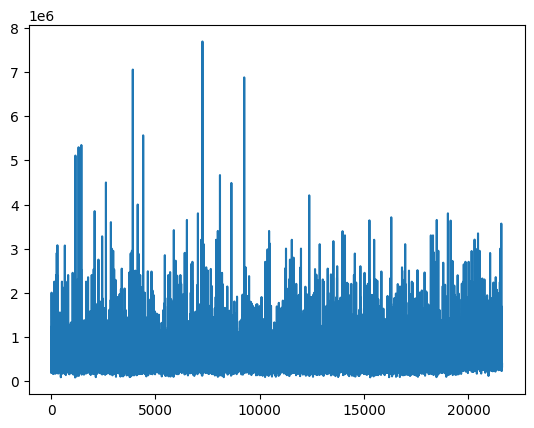

In [10]:
# Plotar um gráfico de barras o preço dos imovéis
# Se no método plot não for especificado nenhum parâmetro, ele ira gerar as coisas padrões
dataset['price'].plot()
plt.show()

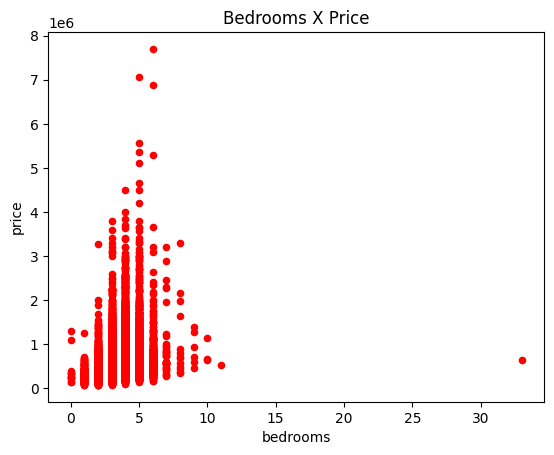

In [9]:
# Plotar um gráfico de dispersão o preço e o número de quartos de imóveis
dataset.plot(x='bedrooms', y='price', kind='scatter', title='Bedrooms X Price', color='r')
plt.show()

<Axes: xlabel='bathrooms', ylabel='price'>

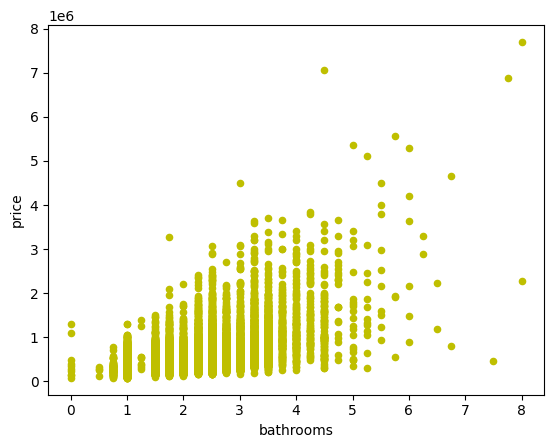

In [11]:
# plota em gráfico de dispersão o preço e o número de banheiros
dataset.plot(x='bathrooms', y='price', kind='scatter', color='y')

___

#### Continuando sobre a visualização (F082

<Axes: >

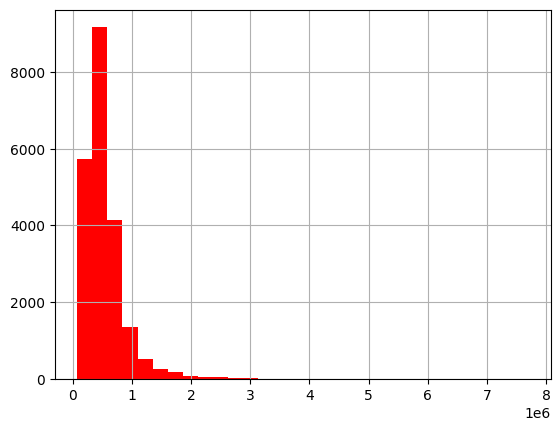

In [13]:
# plota um histograma com a coluna 'price' com 30 bins (são a quantidade de barras) na cor vermelha
dataset['price'].hist(bins=30, color='red')

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>]], dtype=object)

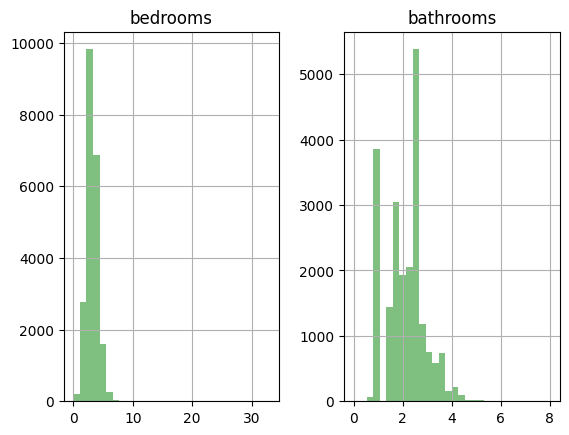

In [15]:
# Plota histogramas das colunas 'bedroom' e 'bathrooms' lado a lado na cor verde.
# o parâmetro alpha serve para a opacidade da cor das barras (bins)
dataset[['bedrooms', 'bathrooms']].hist(bins=30, alpha=0.5, color="Green")

## Estatística Descritiva

In [16]:
# Imprime o valor médio da coluna 'bedrooms'
dataset['bedrooms'].mean()

np.float64(3.37084162309721)

In [18]:
# Imprime o valor máximo da coluna 'bedrooms'
dataset['bedrooms'].max()

np.int64(33)

In [19]:
# Imprime o valor mínimo da coluna 'bedrooms'
dataset['bedrooms'].min()

np.int64(0)

In [20]:
# Imprime o desvio padrão da coluna 'bedrooms'
dataset['bedrooms'].std()

np.float64(0.9300618311474517)

In [22]:
# Imprime o valor de simetria da coluna 'bedrooms'
dataset['bedrooms'].skew()

np.float64(1.97429953543601)

O método `skew()` retorna o valor de simetria de cada coluna do dataset;

- Um valor zero indica uma distribuição simétrica;
- Um valor maior que zero ou menor indica uma distribuição assimétrica:
    - Valores acima de zero podemos dizer que existe uma assimetria positiva.
    - Valores abaixo de zero, uma assimetria negativa.
- Isso quer dizer que valores muito acima de zero indicam que existem mais valores acima da média, e valores abaixo de zero significa que contém mais valores abaixo da média.

___

## Gráficos de BoxPlot

O boxplot (ou gráfico de caixa) é um dos gráficos estatísticos mais importantes porque resume, de forma visual e compacta, a distribuição de um conjunto de dados numéricos. Ele é excelente para identificar tendências centrais, dispersão e outliers (valores atípicos).

## Extraindo Insights

Vamos agora trabalhar com o gráfico que vimos anteriormente, o boxplot. Esse tipo de gráfico são excelentes ferramentas de análise de dados, principalmente para identificar **outliers**.

_`Outliers são pontos de dados que se afastam significativamente da norma ou do padrão geral de um conjunto de dados, sendo considerados "fora da curva" ou "atípicos".`_

In [13]:
import matplotlib as plt

In [14]:
# Plota gráfico do tipo Boxplot da coluna bedrooms
# Esse gráfico é muito rico e é possível visualizar outliers

plt.style.use('ggplot') # Definindo um estilo de gráfico diferente

dataset.boxplot(column='bedrooms')

<Axes: title={'center': 'price'}, xlabel='bedrooms'>

In [9]:
# Visualizando os estilos de layouts disponível
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [15]:
# Plota boxplot da coluna 'price' por número de quartos
dataset.boxplot(column='price', by='bedrooms')

<Axes: title={'center': 'price'}, xlabel='bedrooms'>

### Correlação

In [19]:
# Imprime a correlação de todasa as counas do dataframe (person - é o parâmetro padrão e o tipo de correlação a ser feito)
dataset.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005577,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010830,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005577,1.000000,-0.004357,-0.016800,-0.034410,-0.034559,0.006313,-0.022491,0.001356,-0.001800,...,-0.039912,-0.027947,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.016762,-0.004357,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.016800,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477616,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,-0.034410,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685363,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,-0.034559,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876644,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.006313,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183511,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,-0.022491,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523899,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.001356,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072074,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001800,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167648,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


In [20]:
# Imprime a correlação de spearman (esta leva em consideração a correção positiva e negativa)
dataset.corr('spearman')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.004663,0.004178,0.006250,0.015051,0.001656,-0.116792,0.018837,-0.003573,0.012552,...,0.019835,0.003544,0.001408,0.026537,-0.017473,-0.005359,-0.003732,0.007413,-0.000035,-0.114735
date,0.004663,1.000000,-0.010797,-0.017084,-0.033740,-0.034613,-0.013225,-0.023274,0.002108,0.000259,...,-0.041063,-0.025959,-0.013796,-0.001813,-0.024245,0.000585,-0.030024,-0.004669,-0.027929,-0.012738
price,0.004178,-0.010797,1.000000,0.344652,0.497160,0.644191,0.074939,0.322347,0.115089,0.293931,...,0.658215,0.541741,0.251704,0.102038,0.101876,-0.008735,0.456409,0.063537,0.572290,0.062766
bedrooms,0.006250,-0.017084,0.344652,1.000000,0.521406,0.647366,0.216531,0.227541,-0.007598,0.081421,...,0.380534,0.539734,0.230496,0.180022,0.016877,-0.167186,-0.021185,0.191389,0.443816,0.201577
bathrooms,0.015051,-0.033740,0.497160,0.521406,1.000000,0.745526,0.068805,0.546800,0.049522,0.155549,...,0.658194,0.691040,0.191848,0.566982,0.042688,-0.204783,0.008283,0.261539,0.570304,0.063111
sqft_living,0.001656,-0.034613,0.644191,0.647366,0.745526,1.000000,0.304159,0.401267,0.070326,0.232994,...,0.716400,0.843528,0.327878,0.352421,0.052679,-0.206848,0.030980,0.284584,0.746982,0.283864
sqft_lot,-0.116792,-0.013225,0.074939,0.216531,0.068805,0.304159,1.000000,-0.234433,0.085601,0.117033,...,0.152049,0.272410,0.036624,-0.037569,0.008536,-0.319494,-0.122052,0.370551,0.359572,0.922316
floors,0.018837,-0.023274,0.322347,0.227541,0.546800,0.401267,-0.234433,1.000000,0.023879,0.019655,...,0.501684,0.599309,-0.272458,0.551663,0.012579,-0.061461,0.024564,0.148651,0.305434,-0.231386
waterfront,-0.003573,0.002108,0.115089,-0.007598,0.049522,0.070326,0.085601,0.023879,1.000000,0.284924,...,0.062189,0.054493,0.051969,-0.028605,0.091649,0.029591,-0.019044,-0.038139,0.074564,0.092271
view,0.012552,0.000259,0.293931,0.081421,0.155549,0.232994,0.117033,0.019655,0.284924,1.000000,...,0.217044,0.144404,0.236525,-0.066607,0.096539,0.078215,-0.000073,-0.102728,0.255793,0.116520


In [21]:
# Imprime a correção de algumas colunas
dataset[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'price']].corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,price
bedrooms,1.000000,0.515884,0.576671,0.175429,-0.006582,0.356967,0.308350
bathrooms,0.515884,1.000000,0.754665,0.500653,0.063744,0.664983,0.525138
sqft_living,0.576671,0.754665,1.000000,0.353949,0.103818,0.762704,0.702035
floors,0.175429,0.500653,0.353949,1.000000,0.023698,0.458183,0.256794
waterfront,-0.006582,0.063744,0.103818,0.023698,1.000000,0.082775,0.266369
grade,0.356967,0.664983,0.762704,0.458183,0.082775,1.000000,0.667434
price,0.308350,0.525138,0.702035,0.256794,0.266369,0.667434,1.000000


In [23]:
# Plotando a correlação de algumas colunas
dataset[['sqft_living', 'waterfront', 'grade', 'price']].corr().plot()

<Axes: >

___